In [17]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib import style

style.use('ggplot')

In [18]:
ibm_prices_diffs_returns_week = pd.read_hdf('IBM.h5')

#日期範圍
start_date = ibm_prices_diffs_returns_week.index[0]
end_date = ibm_prices_diffs_returns_week.index[-1]
ibm_prices_diffs_returns_week

,High,Low,Open,Close,Volume,AdjClose,Scale,Net,D_High,D_Low,...,A_P_Close,S_P_Close,A_P_Volume,S_P_Volume,A_P_AdjClose,S_P_AdjClose,A_P_Scale,S_P_Scale,A_P_Net,S_P_Net
Date,,,,,,,,,,,,,,,,,,,,,
2021-01-04,120.382408,117.629066,120.315491,118.489487,5417.443,111.285995,-1.826004,2.753342,-0.105164,-0.908218,...,0.004285,0.016602,0.106956,0.338041,0.004285,0.016602,-1.005684,1.259128,0.222653,0.800347
2021-01-05,121.108986,119.130020,119.512428,120.592735,6395.872,113.261375,1.080307,1.978966,0.726578,1.500954,...,0.004285,0.016602,0.106956,0.338041,0.004285,0.016602,-1.005684,1.259128,0.222653,0.800347
2021-01-06,126.080307,121.147224,121.319313,123.604210,8322.708,116.089767,2.284897,4.933083,4.971321,2.017204,...,0.004285,0.016602,0.106956,0.338041,0.004285,0.016602,-1.005684,1.259128,0.222653,0.800347
2021-01-07,124.722755,122.619499,124.321220,123.317398,4714.740,115.820404,-1.003822,2.103256,-1.357552,1.472275,...,0.004285,0.016602,0.106956,0.338041,0.004285,0.016602,-1.005684,1.259128,0.222653,0.800347
2021-01-08,123.632889,121.395790,122.915871,122.877632,4891.305,115.407372,-0.038239,2.237099,-1.089867,-1.223709,...,0.004285,0.016602,0.106956,0.338041,0.004285,0.016602,-1.005684,1.259128,0.222653,0.800347
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-27,131.649994,129.949997,130.630005,131.619995,4293.900,130.053436,0.989990,1.699997,0.689987,0.429993,...,0.004603,0.003905,0.003840,0.219493,0.004603,0.003905,-0.684470,1.453304,0.036518,0.304755
2021-12-28,133.220001,131.589996,131.600006,132.630005,3445.200,131.051422,1.029999,1.630005,1.570007,1.639999,...,0.004603,0.003905,0.003840,0.219493,0.004603,0.003905,-0.684470,1.453304,0.036518,0.304755
2021-12-29,134.210007,132.300003,132.399994,133.350006,4239.900,131.762848,0.950012,1.910004,0.990005,0.710007,...,0.004603,0.003905,0.003840,0.219493,0.004603,0.003905,-0.684470,1.453304,0.036518,0.304755


In [23]:
my_stock=ibm_prices_diffs_returns_week[['Scale','P_Scale','D_Scale','A_Scale','S_Scale']]

In [24]:
def partial_dataset(my_dataset): #前後五筆資料
    return pd.concat([my_dataset.head(), my_dataset.tail()], axis=0)


In [25]:
def exclude_outliers(my_dataset, col_name, ratio=1.0):
    _mean = my_dataset[col_name].mean()
    _std = ratio * my_dataset[col_name].std()
    
    _seires = np.abs(my_dataset[col_name] - _mean)
    return my_dataset.loc[_seires < _std].copy()


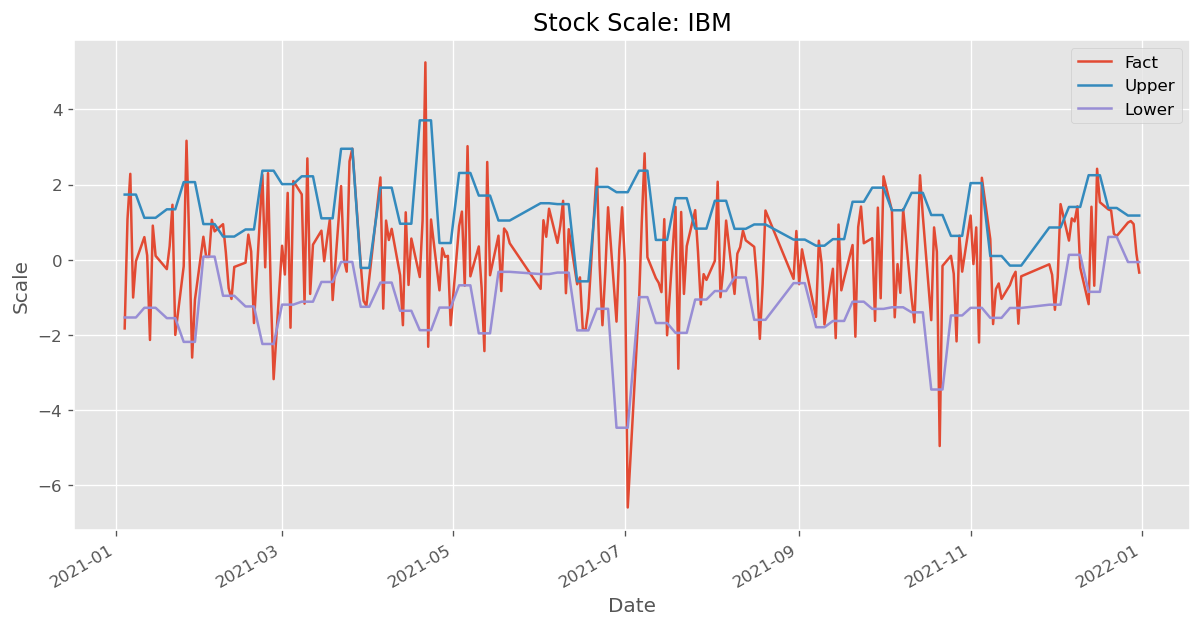

In [26]:
fig, ax = plt.subplots(figsize=(12, 6), dpi=120)

my_stock['Scale'].plot(label='Fact')

upper = my_stock['A_Scale'] + my_stock['S_Scale']
lower = my_stock['A_Scale'] - my_stock['S_Scale']

upper.plot(label='Upper')
lower.plot(label='Lower')

ax.set_title('Stock Scale: IBM')

plt.xlabel('Date')
plt.ylabel('Scale')

plt.legend(loc='best')

plt.show()

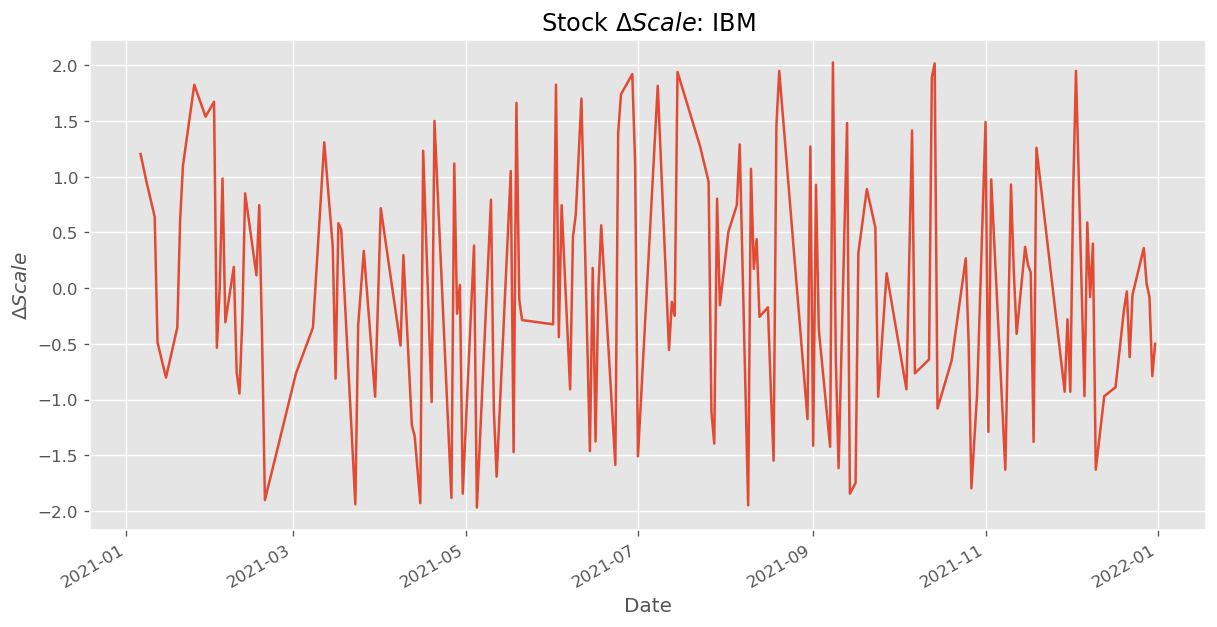

In [27]:
fig, ax = plt.subplots(figsize=(12, 6), dpi=120)

_my_data = exclude_outliers(my_stock, 'D_Scale')
_my_data['D_Scale'].plot(ax=ax)

ax.set_title('Stock $\Delta {Scale} $: IBM')

plt.xlabel('Date')
plt.ylabel('$\Delta {Scale} $')

plt.show()

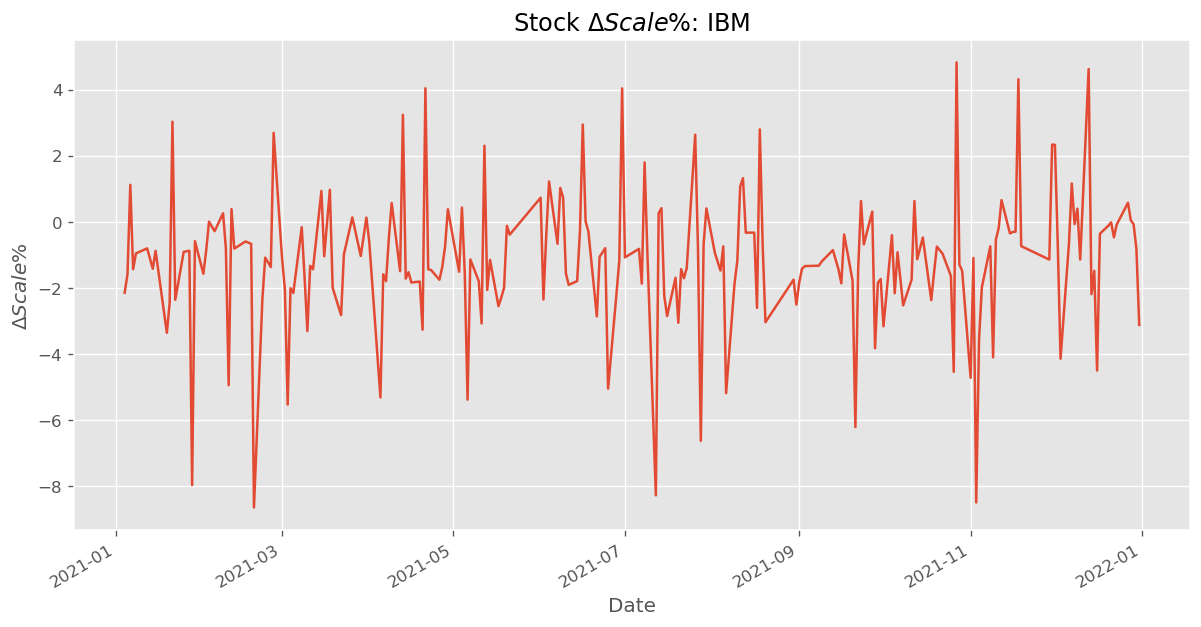

In [28]:
fig, ax = plt.subplots(figsize=(12, 6), dpi=120)

_my_data = exclude_outliers(my_stock, 'P_Scale')
_my_data['P_Scale'].plot(ax=ax)

ax.set_title('Stock $\Delta {Scale} \% $: IBM')

plt.xlabel('Date')
plt.ylabel('$\Delta {Scale} \% $')

plt.show()

In [29]:
num_simulations = 50

_my_data = exclude_outliers(my_stock, 'Scale')
num_days = _my_data.shape[0]

simulation_df = None

for i in range(num_simulations):
    _my_stock = []
    
    for day in range(num_days):
        row = _my_data.iloc[day]
               
        _ibm_Scale = np.random.normal(loc=row['A_Scale'], scale=row['S_Scale'])
        
        if _ibm_Scale <= 0:
            _ibm_Scale = row['Scale']
            
        _my_stock.append(_ibm_Scale)
    
    subset = pd.DataFrame(data={'%d' % i: _my_stock.copy() })
    
    if simulation_df is None:
        simulation_df = subset
    else:
        simulation_df = pd.concat([simulation_df, subset], axis=1)

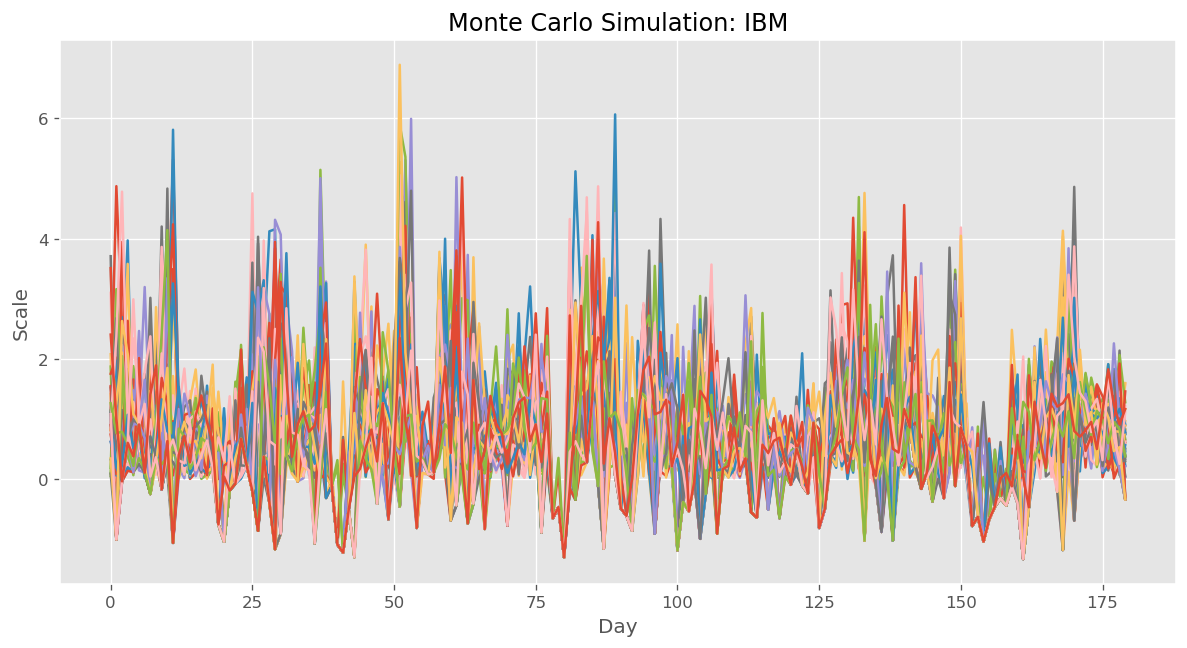

In [30]:
fig, ax = plt.subplots(figsize=(12, 6), dpi=120)

ax.plot(simulation_df)
ax.set_title('Monte Carlo Simulation: IBM')

plt.xlabel('Day')
plt.ylabel('Scale')

plt.show()